# Preprocessing

In [56]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data=pd.read_csv('banknote.csv', encoding='latin')
print('Shape:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

Shape: (1372, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [57]:
feature_names=np.array(data.columns)[:-1]
target=data.columns[-1]
Nfeatures=len(feature_names)

print(feature_names)
print(target)
print(Nfeatures)


['variance of Wavelet' 'skewness of Wavelet' 'curtosis of Wavelet'
 'entropy']
class
4


In [58]:
y = data[target]
X = data.drop(axis=1,labels=target,inplace=False)

In [59]:
data.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [60]:
colors = ['#DF2020', '#81DF20']
Colorlist=[]
for i in y:
    if i==1.0:
        Colorlist.append(colors[0])
    else:
        Colorlist.append(colors[1])
        

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_2=StandardScaler().fit_transform(X)



# try to use different method of combination/reduction of dimension

# PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=500)


explained_variance_ratio: [0.54497602 0.32328872]


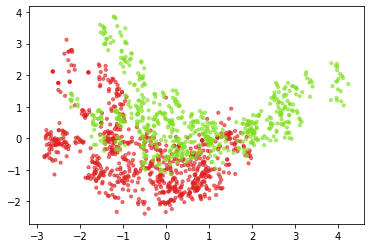

In [8]:
data2=pca.fit_transform(X_2)
print("explained_variance_ratio:",pca.explained_variance_ratio_)
plt.scatter(data2[:,0],data2[:,1],c=Colorlist, alpha = 0.6, s=10)



# MDS

In [9]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,
                metric = True, #default True
                dissimilarity='euclidean' # default euclidean
               )

stress: 28862.142553313344


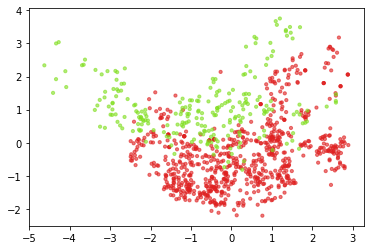

In [10]:
X_mds= embedding.fit_transform(X_2[:1000])
print("stress:",embedding.stress_)
plt.scatter(X_mds[:,0],X_mds[:,1],c=Colorlist[:1000], alpha = 0.6, s=10)

# UMAP

In [11]:
import umap
reducer = umap.UMAP(n_components=2)


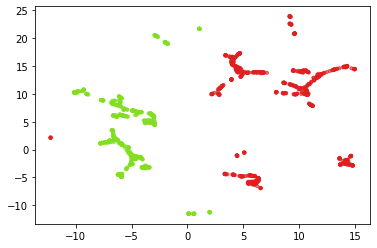

In [12]:
embedding = reducer.fit_transform(X_2)
plt.scatter(embedding[:,0],embedding[:,1],c=Colorlist, alpha = 0.6, s=10)

# t-SNE

In [79]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,learning_rate=200,init='random',random_state=0)

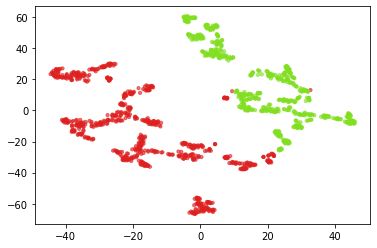

In [81]:
tsne_result = tsne.fit_transform(X_2)
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)



# ===================================================

# we choose t-SNE, because we can see obvious segments

# Clustering

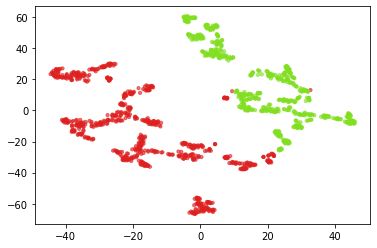

In [82]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# Now we choose the segment at the top of the graph (y<-45), and use Skope-rules

number of points: 77
average prediction: 1.0


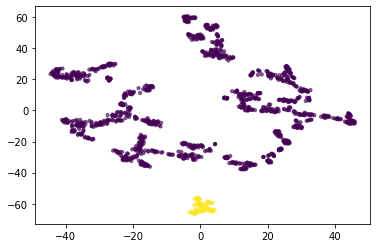

In [86]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][1]<-45:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())    

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Cluster, alpha = 0.6, s=10)

In [87]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules


skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()


Rules

rule: variance of Wavelet > 1.6955000162124634 and skewness of Wavelet > 9.340699672698975 and entropy <= -1.92044997215271
precision: 1.0
recall: 0.9838709677419355

rule: skewness of Wavelet <= 9.446249961853027 and skewness of Wavelet > 8.994100093841553 and curtosis of Wavelet <= -3.7429999113082886
precision: 1.0
recall: 0.07272727272727272

rule: variance of Wavelet > 2.852199912071228 and skewness of Wavelet <= 9.34274959564209 and skewness of Wavelet > 8.994100093841553
precision: 1.0
recall: 0.05172413793103448




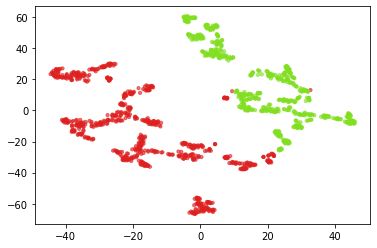

In [88]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# we choose another segment (y>45)

number of points: 102
average prediction: 2.0


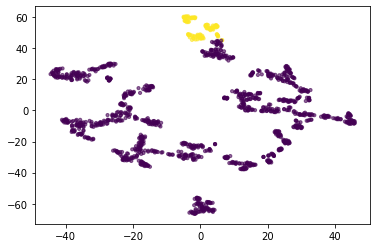

In [89]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][1]>45:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())    

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Cluster, alpha = 0.6, s=10)

In [90]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: curtosis of Wavelet > 8.96054983139038 and entropy <= 1.2003999948501587
precision: 1.0
recall: 0.8941176470588236

rule: variance of Wavelet <= 0.06499999761581421 and curtosis of Wavelet > 8.632400035858154 and entropy <= 0.09093350172042847
precision: 1.0
recall: 0.8666666666666667

rule: variance of Wavelet <= -1.5012999773025513 and skewness of Wavelet <= -8.019499778747559 and curtosis of Wavelet <= 8.970799922943115
precision: 1.0
recall: 0.14102564102564102

rule: curtosis of Wavelet <= 9.193999767303467 and curtosis of Wavelet > 8.660650253295898 and entropy <= -0.05841749906539917
precision: 1.0
recall: 0.10344827586206896

rule: variance of Wavelet > -2.030550003051758 and skewness of Wavelet <= -8.748950004577637 and curtosis of Wavelet > 8.632400035858154
precision: 1.0
recall: 0.0967866821525358




# we can use other cluster method (but not manually)

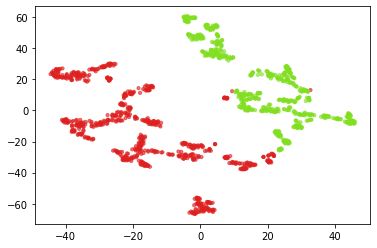

In [91]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## kmeans

In [92]:
from sklearn.cluster import KMeans

N_clusters=6 # please choose 

kmeans = KMeans(n_clusters=N_clusters, random_state=0)

Cluster_kmeans=kmeans.fit_predict(tsne_result)

In [93]:
a=[]
for i in range(N_clusters):
    a.append([[],[]])

for i in range(len(y)):
        a[Cluster_kmeans[i]][0].append(tsne_result[i][0])
        a[Cluster_kmeans[i]][1].append(tsne_result[i][1])

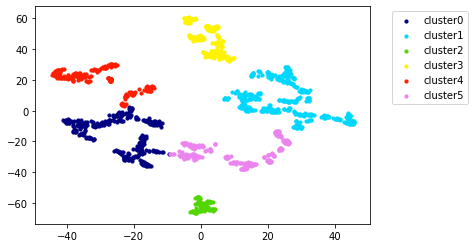

In [94]:
import matplotlib
import matplotlib.cm as cm

N=N_clusters
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.9,N)]


fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(N_clusters):
    ax.scatter(a[i][0],a[i][1],color=colors[i],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### we can choose the cluster0

number of points: 314
average prediction: 1.0


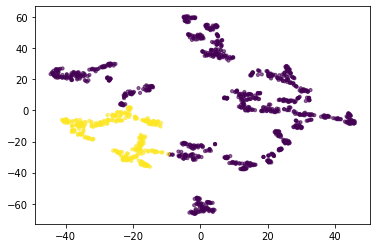

In [95]:
clusterN=0

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if Cluster_kmeans[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())

plt.scatter(tsne_result[:,0],tsne_result[:,1],c=label_for_skope, alpha = 0.6, s=10)

In [96]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet > 1.5850499868392944 and skewness of Wavelet > -0.6342400014400482 and entropy > -1.5726499557495117
precision: 0.9436619718309859
recall: 0.8104838709677419

rule: variance of Wavelet <= 2.4010000228881836 and variance of Wavelet > -0.16989000141620636 and curtosis of Wavelet > -0.1793700009584427
precision: 0.41358024691358025
recall: 0.2607003891050584

rule: variance of Wavelet <= 2.410199999809265 and variance of Wavelet > 0.3301749974489212 and entropy > -0.6493600010871887
precision: 0.47244094488188976
recall: 0.23346303501945526




# another cluster method


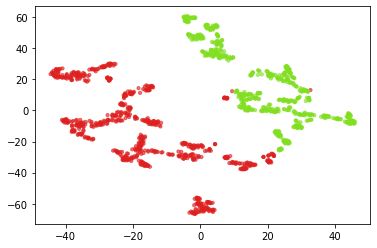

In [97]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## dbscan (we need to choose proper value of epsilon and M)

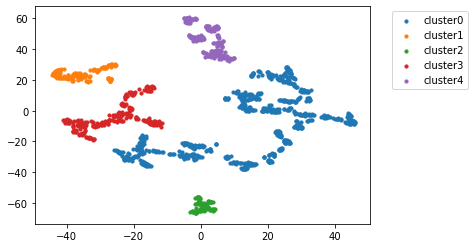

In [98]:
from sklearn.cluster import DBSCAN

epsilon = 6
M = 4

result_dbscan = DBSCAN(eps = epsilon, min_samples = M+1,algorithm='brute').fit_predict(tsne_result)


a=[]
for i in range(len(set(result_dbscan))):
    a.append([[],[]])   
    
for i in range(len(y)):
        a[result_dbscan[i]][0].append(tsne_result[i][0])
        a[result_dbscan[i]][1].append(tsne_result[i][1])

N=len(np.unique(result_dbscan))
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.9,N)]        
        
        
fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(len(set(result_dbscan))):
    ax.scatter(a[i][0],a[i][1],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


### we can choose the cluster1 for skope-rules

number of points: 131
average prediction: 1.0


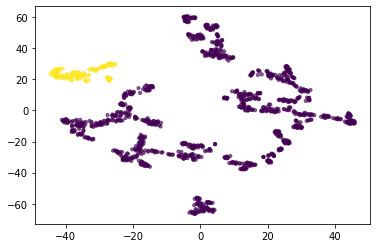

In [99]:
clusterN=1

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if result_dbscan[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())       
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=label_for_skope, alpha = 0.6, s=10)

In [100]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet > 0.28189999610185623 and skewness of Wavelet <= -2.0257999897003174 and curtosis of Wavelet > 1.8153499960899353
precision: 1.0
recall: 0.965376056964842


